In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("nutrient.csv")
df.dtypes

S.No          int64
Protein     float64
Fat         float64
vitaminC    float64
Fibre       float64
Product      object
dtype: object

In [2]:
df.head()

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,1,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with..."
1,2,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks
2,3,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include..."
3,4,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT"
4,5,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned"


In [3]:
df.drop(labels=["S.No"],axis=1,inplace=True)

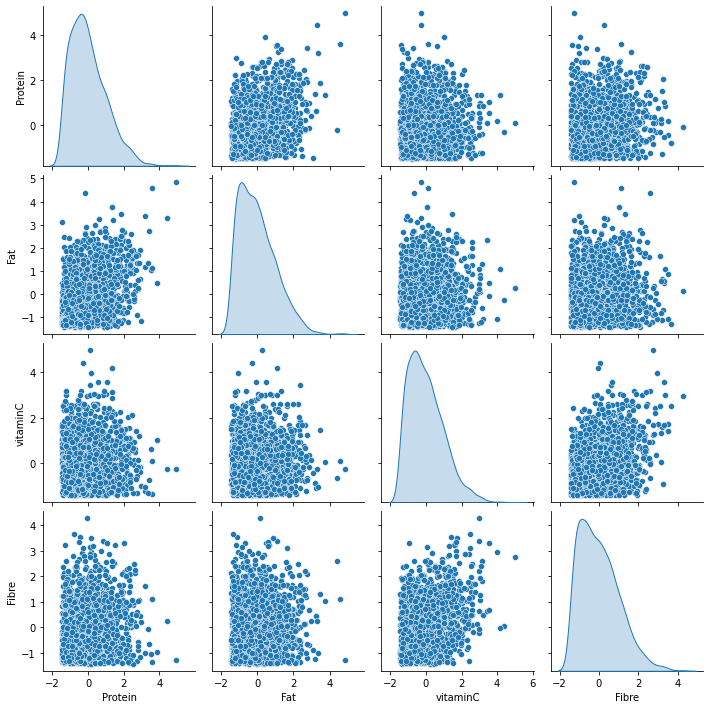

In [4]:
attr=df.iloc[:,0:4]
scaled=attr.apply(zscore)
sns.pairplot(scaled,diag_kind='kde')

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

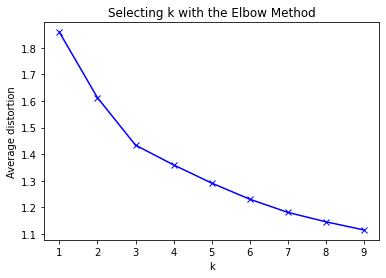

In [5]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k,random_state=1)
    model.fit(scaled)
    prediction=model.predict(scaled)
    meanDistortions.append(sum(np.min(cdist(scaled, model.cluster_centers_, 'euclidean'), axis=1)) / scaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [6]:
# Let us first start with K = 3
final_model=KMeans(n_clusters=3,random_state=1)
final_model.fit(scaled)
prediction=final_model.predict(scaled)

#Append the prediction 
df["GROUP"] = prediction
#scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Protein,Fat,vitaminC,Fibre,Product,GROUP
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",0
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,1
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",0
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",2
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",2


In [7]:
clust = df.groupby(['GROUP'])
clust.mean()

,Protein,Fat,vitaminC,Fibre
GROUP,,,,
0,0.768839,0.804329,1.558258,1.549467
1,1.552066,1.556525,0.791801,0.824236
2,0.630631,0.561205,0.611007,0.597900


In [8]:
print("Silhouette score:",silhouette_score(scaled, final_model.predict(scaled)))

Silhouette score: 0.2531861555258712


array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fibre'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

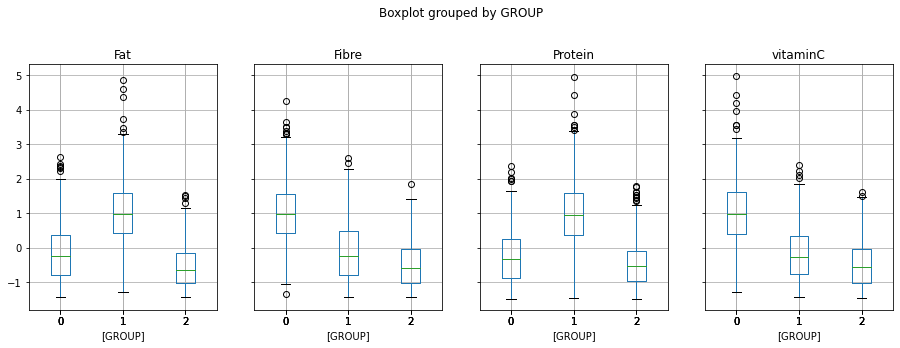

In [12]:
scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [13]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(scaled)
prediction=final_model.predict(scaled)

#Append the prediction 
df["GROUP"] = prediction
scaled["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Protein,Fat,vitaminC,Fibre,Product,GROUP
0,0.452369,1.170926,1.079271,1.702960,"Amaranth leaves, cooked, boiled, drained, with...",1
1,2.321087,0.706856,0.350088,0.658249,Bacon and beef sticks,3
2,0.884554,1.186571,2.428544,1.984562,"Apples, frozen, unsweetened, unheated (Include...",2
3,0.715501,0.577599,0.270925,0.369266,"Alcoholic beverage, beer, light, BUD LIGHT",0
4,0.132610,0.544521,0.116884,0.557309,"Alcoholic beverage, daiquiri, canned",0


In [14]:
clust = df.groupby(['GROUP'])
clust.mean()

,Protein,Fat,vitaminC,Fibre
GROUP,,,,
0,0.629907,0.534437,0.607372,0.605037
1,0.640116,0.678181,1.403142,1.454623
2,1.383640,1.243348,2.040473,1.929794
3,1.907448,1.348947,0.738916,0.768796
4,0.939721,1.766790,0.810859,0.768661


array([[<AxesSubplot:title={'center':'Fat'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Fibre'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'Protein'}, xlabel='[GROUP]'>,
        <AxesSubplot:title={'center':'vitaminC'}, xlabel='[GROUP]'>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

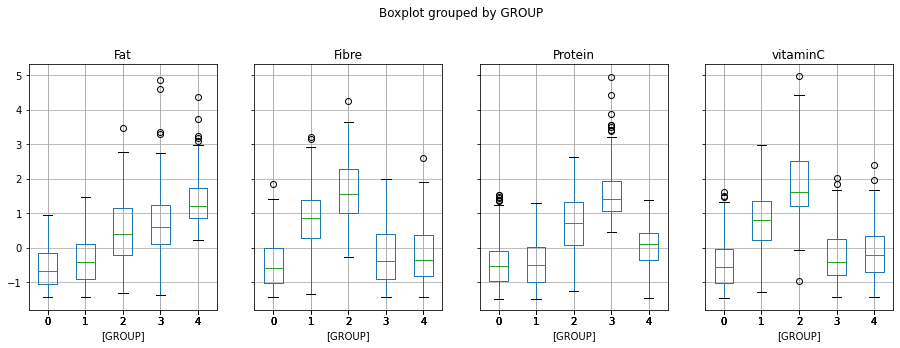

In [15]:
scaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [16]:
from sklearn.cluster import AgglomerativeClustering 

In [17]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')

In [18]:
model.fit(scaled)

AgglomerativeClustering(n_clusters=3)

In [21]:
attr['labels'] = model.labels_
attr.head(10)


,Protein,Fat,vitaminC,Fibre,labels
0,0.452369,1.170926,1.079271,1.702960,1
1,2.321087,0.706856,0.350088,0.658249,2
2,0.884554,1.186571,2.428544,1.984562,1
3,0.715501,0.577599,0.270925,0.369266,0
4,0.132610,0.544521,0.116884,0.557309,0
5,1.267150,0.234292,0.546766,0.386447,0
6,0.351557,0.677176,0.551181,1.102799,0
7,0.635325,1.223652,0.330483,0.675459,0
8,0.527588,1.250053,1.247867,0.889896,1
9,0.598690,0.068307,1.423195,0.339158,0


In [22]:
custDataClust = attr.groupby(['labels'])

In [23]:
custDataClust.mean()

,Protein,Fat,vitaminC,Fibre
labels,,,,
0,0.732190,0.829793,0.642972,0.626028
1,0.760267,0.797587,1.559782,1.547314
2,1.987370,1.365816,0.847080,0.943230


In [9]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [10]:
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [17]:
Z = linkage(scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(scaled))

c

0.48695720693048394

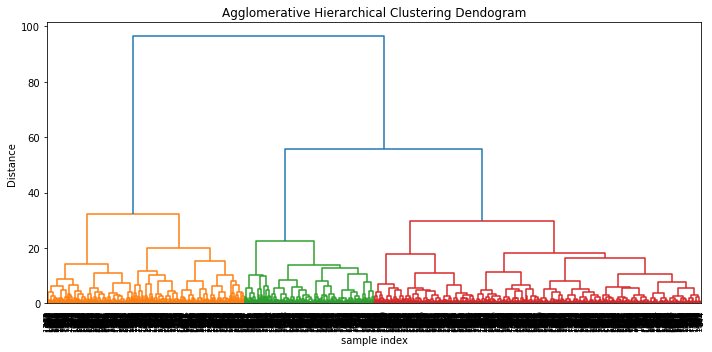

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [34]:
Z = linkage(scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(scaled))

c

0.48695720693048394

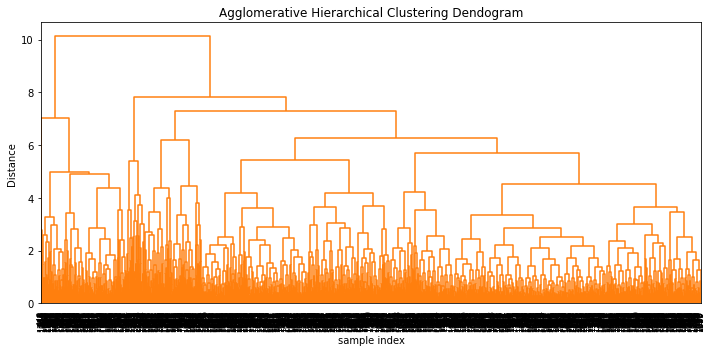

In [24]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [53]:
Z = linkage(scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(scaled))

c

0.5994936878691663

In [54]:
Z.shape

(1745, 4)

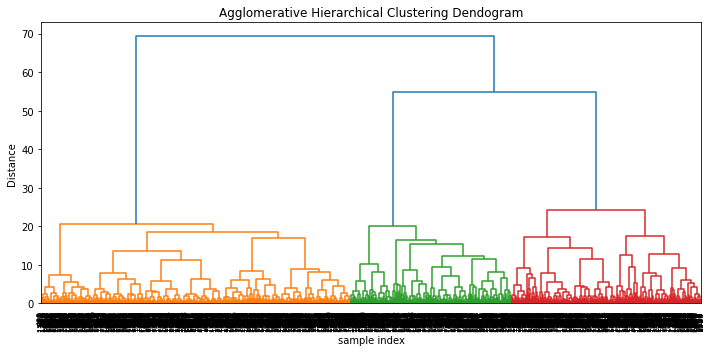

In [55]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [56]:
Z

array([[3.12000000e+02, 1.06100000e+03, 3.82132064e-02, 2.00000000e+00],
       [6.72000000e+02, 1.06600000e+03, 5.56306634e-02, 2.00000000e+00],
       [1.77000000e+02, 1.54900000e+03, 6.49979125e-02, 2.00000000e+00],
       ...,
       [3.48300000e+03, 3.48400000e+03, 2.42526594e+01, 5.02000000e+02],
       [3.48600000e+03, 3.48800000e+03, 5.47326343e+01, 9.27000000e+02],
       [3.48700000e+03, 3.48900000e+03, 6.94541643e+01, 1.74600000e+03]])

In [22]:
covMatrix = np.cov(scaled,rowvar=False)
print(covMatrix)

[[ 1.00057307  0.38253077  0.02540316  0.04384809  0.66700984]
 [ 0.38253077  1.00057307  0.04829969  0.06811834  0.61558052]
 [ 0.02540316  0.04829969  1.00057307  0.36167341 -0.50557778]
 [ 0.04384809  0.06811834  0.36167341  1.00057307 -0.52498715]
 [ 0.66700984  0.61558052 -0.50557778 -0.52498715  1.74385497]]


In [31]:
pca = PCA(n_components=4)
pca.fit(scaled)

PCA(n_components=4)

In [32]:
print(pca.explained_variance_)

[2.70091959 1.46189325 0.64004372 0.61732212]


In [33]:
print(pca.components_)

[[ 0.36924828  0.34400088 -0.27244848 -0.27310907  0.77233565]
 [ 0.43031765  0.46246245  0.53709172  0.55845684 -0.02477173]
 [ 0.01363879 -0.05473627  0.73706409 -0.67226713  0.04014183]
 [-0.69416267  0.7167517   0.00675578 -0.06552125 -0.00815538]]


In [34]:
print(pca.explained_variance_ratio_)

[0.4700401  0.25441277 0.11138658 0.10743235]


In [35]:
pca3 = PCA(n_components=3)
pca3.fit(scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(scaled)

[[ 0.36924828  0.34400088 -0.27244848 -0.27310907  0.77233565]
 [ 0.43031765  0.46246245  0.53709172  0.55845684 -0.02477173]
 [ 0.01363879 -0.05473627  0.73706409 -0.67226713  0.04014183]]
[0.4700401  0.25441277 0.11138658]


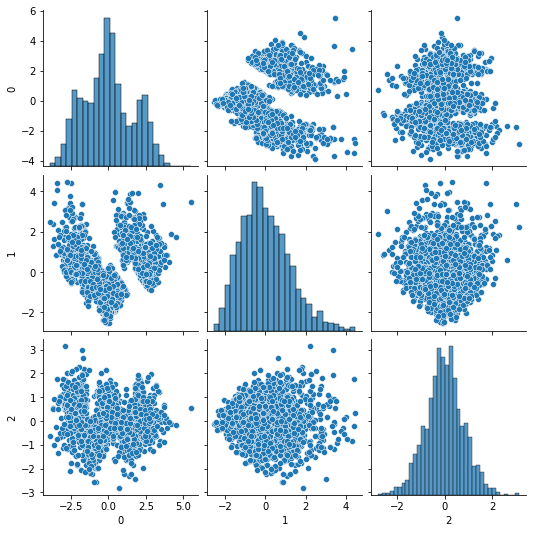

In [36]:
sns.pairplot(pd.DataFrame(Xpca3))


In [4]:
Q3 = np.quantile(df["Protein"], 0.75)
Q1 = np.quantile(df["Protein"], 0.25)
IQR = Q3 - Q1

print(IQR)

0.8592526325000001


In [5]:
df.describe()

,Protein,Fat,vitaminC,Fibre
count,1746.000000,1746.000000,1746.000000,1746.000000
mean,0.922470,0.900091,0.900146,0.900830
std,0.627128,0.634617,0.623847,0.626875
min,0.000128,0.000267,0.000029,0.002579
25%,0.435853,0.394784,0.419103,0.389124
50%,0.813025,0.804687,0.796290,0.820783
75%,1.295106,1.298988,1.280870,1.295732
max,4.016890,3.979364,4.013322,3.570331


In [6]:
df["Fat"].median()

0.8046873720000001

In [7]:
df["Fat"].mean()

0.9000909736099644

<AxesSubplot:>

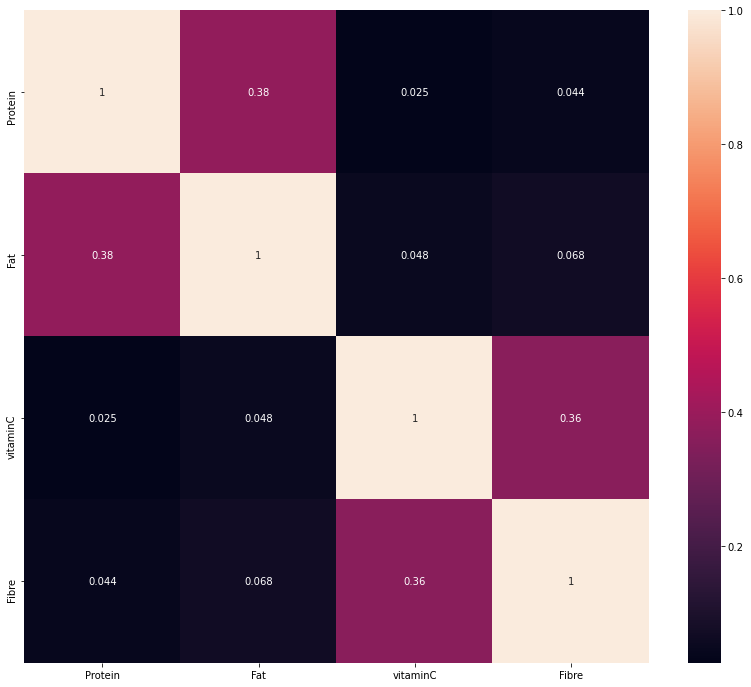

In [8]:
# plot the correlation coefficients 
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(df.corr(), annot=True,ax=ax) 

In [64]:
s=attr[attr['Protein']>1]

<AxesSubplot:>

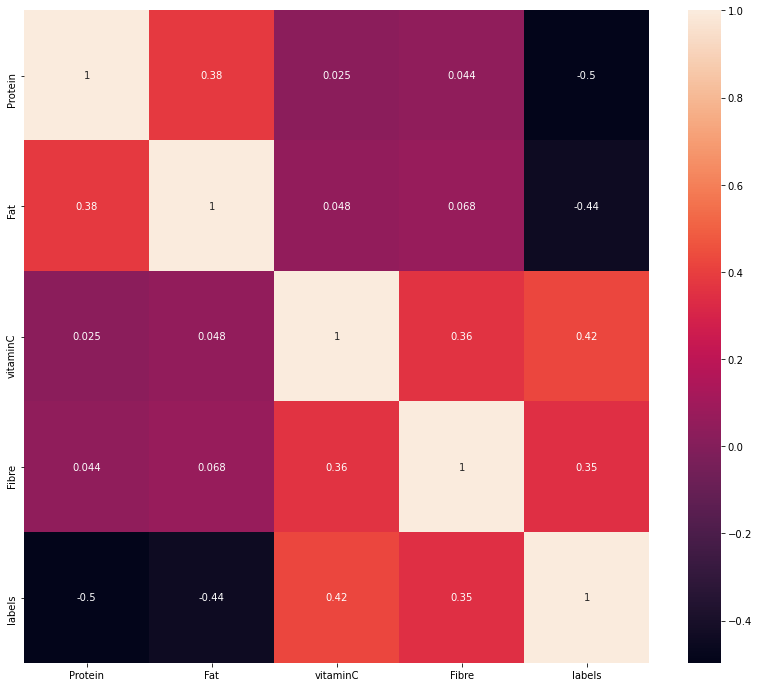

In [63]:
fig, ax = plt.subplots(figsize=(14,12))
sns.heatmap(attr.corr(), annot=True,ax=ax) 

In [65]:
s.tail()

,Protein,Fat,vitaminC,Fibre,labels
1736,1.342662,1.601733,0.329100,0.008795,0
1737,2.002751,0.798049,0.303793,0.251873,0
1741,1.188371,1.963861,1.144457,1.438795,0
1742,2.325762,1.970995,1.352002,0.051109,0
1745,2.013799,0.576179,0.515998,1.536694,0


In [66]:
s

,Protein,Fat,vitaminC,Fibre,labels
1,2.321087,0.706856,0.350088,0.658249,0
5,1.267150,0.234292,0.546766,0.386447,1
10,1.586428,1.193824,0.730394,1.569223,0
12,1.100889,0.076211,0.263844,0.104491,1
13,1.638378,1.626970,0.244704,0.888553,0
...,...,...,...,...,...
1736,1.342662,1.601733,0.329100,0.008795,0
1737,2.002751,0.798049,0.303793,0.251873,0
1741,1.188371,1.963861,1.144457,1.438795,0
1742,2.325762,1.970995,1.352002,0.051109,0


In [72]:
s = attr[attr['Fibre']>1]

In [73]:
s = s[s['Fat']<=0.5]

In [75]:
s = s[s['Fat']>0.3]

In [76]:
s

,Protein,Fat,vitaminC,Fibre,labels
78,0.488031,0.361078,1.633036,1.187671,2
84,0.315769,0.399892,1.532733,1.519518,2
100,0.629787,0.482824,0.747901,1.163095,1
107,0.100941,0.374841,1.459818,1.832969,2
108,0.863751,0.325197,0.979301,1.156503,1
...,...,...,...,...,...
1657,0.529016,0.430779,0.377200,1.171521,1
1693,1.123286,0.469970,2.470462,1.190852,2
1707,0.558252,0.365260,0.149369,1.019958,1
1712,0.925037,0.328038,1.331324,1.279198,2
